# <b>1 <span style='color:#0055b3'> | </span> INTRODUCTION</b>
### **GENOME**
A genome is the complete set of genes of an organism. Genes are the part of DNA segment responsible for synthesis of different proteins essential for the body. Genome is arranged in a number of chromosomal pairs, e.g., 23 in humans.
There is a similarity between genes of all living creatures in this planet - they are made up of only four [bases](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/base-pair) <span style='color:#0055b3'><b> Adenine</b></span>,<span style='color:#0055b3'><b>Guanine</b></span>,<span style='color:#0055b3'><b>Cytosine</b></span> and <span style='color:#0055b3'><b>Thymine</b></span>  <br>
Everyone has a different genome but there is more resemblance between genome of two humans than between a human and a chimpanzee, which in turn has more resemblance when compared to a human and a plant.<br>
Thus, it is this information which has given rise to <span style='color:#0055b3'><b>8.7 million</b></span> species on earth.
### **Structure of DNA**
The four bases mentioned above are arranged in a beautiful double helix structre, popular called as [Watson and Crick](https://www.nature.com/scitable/topicpage/discovery-of-dna-structure-and-function-watson-397/) structure. They are linked together by Hydogen bonds with complementary base pairing where Adenine pairs with Thymine with 2 hydrogen bonds and Guanine pairs with Cytosine viz 3 hydrogen bonds. Changes in this sequence is what gives rise to the variation around us.

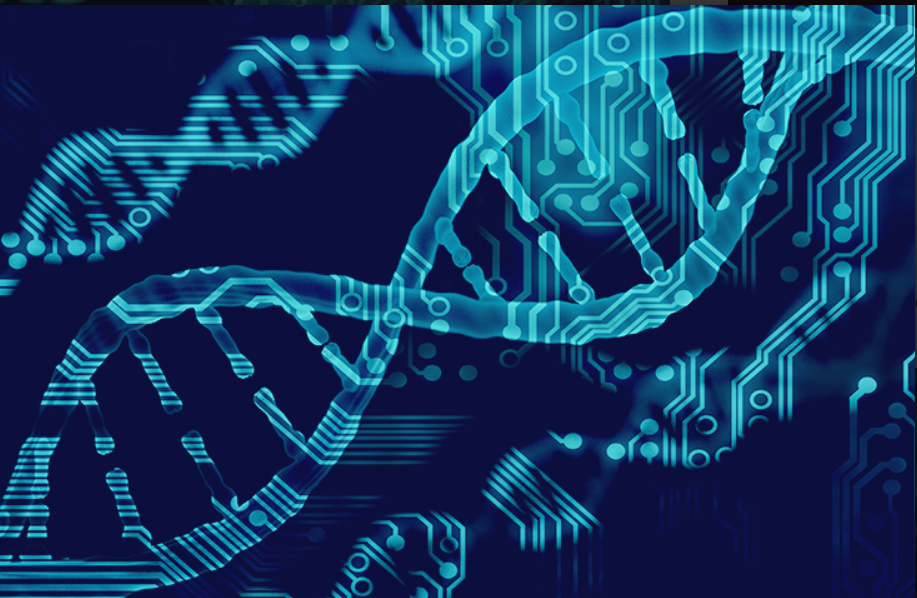

In [2]:
from IPython import display
display.Image('Data/Screenshot 2022-11-08 013937.png')

# <b>2 <span style='color:#0055b3'> | </span> Libraries used</b>
> - **<span style='color:#0055b3'>Biopython</span>** - Makes Biological Computations much faster
> - **<span style='color:#0055b3'>re</span>** - Stands for Regular Expression, efficient in string matching.
> - **<span style='color:#0055b3'>CountVectorizer</span>** - To create a Bag of Words.
> - **<span style='color:#0055b3'>MultinomialNB</span>** - Machine Learning model. Discussed in detail later.
> - **<span style='color:#0055b3'>metrics</span>** - for our loss functions
> - **<span style='color:#0055b3'>MatplotLib</span>** - for ploting various graphs


# <b>3 <span style='color:#0055b3'> | </span>Data</b>
The dataset has genome of humans,chimpanzee and dogs with specific ids and there are 7 classes in total. The following table is of human genome. 
<table>
  <tr>
      <th><span style='color:#0055b3'>Gene Family</span></th>
    <th><span style='color:#0055b3'>Number</span></th>
    <th><span style='color:#0055b3'>Class Label</span></th>
  </tr>
  <tr>
    <td>G protein coupled receptors</td>
    <td>531</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Tyrosine Kinase</td>
    <td>534</td>
    <td>1</td>
  </tr>
    <tr>
    <td>Tyrosine Phosphate</td>
    <td>349</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Sythetase</td>
    <td>672</td>
    <td>3</td>
  </tr>
    <tr>
    <td>Synthase</td>
    <td>711</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Ion Channel</td>
    <td>240</td>
    <td>5</td>
  </tr>
    <tr>
    <td>Transcription Factor</td>
    <td>1343</td>
    <td>6</td>
  </tr>
</table>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#000137;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Importing Libraries</b></p>
</div>

In [1]:
from Bio import SeqIO
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from IPython import display
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div style="color:white;display:fill;border-radius:8px;
            background-color:#000137;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Analysing Data</b></p>
</div>

In [4]:
human_dna = pd.read_table('Data/human.txt')
human_dna.head()


,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [5]:
chimp_dna = pd.read_table('Data/chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [6]:
dog_dna = pd.read_table('Data/dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


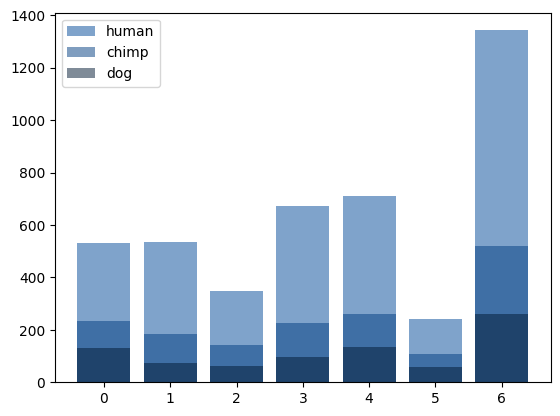

In [7]:
bins = np.linspace(-1, 7, 8)
#print(human_dna['class'])
plt.bar([0,1,2,3,4,5,6],human_dna['class'].value_counts().sort_index(),label = 'human',alpha = 0.5,color ='#004999')
plt.bar([0,1,2,3,4,5,6],chimp_dna['class'].value_counts().sort_index(),label = 'chimp',alpha = 0.5,color ='#003d80')
plt.bar([0,1,2,3,4,5,6],dog_dna['class'].value_counts().sort_index(),label = 'dog',alpha = 0.5,color ='#001833')
plt.legend(loc='upper left')

You can see from the histogram that in our sample data, the amount of Transcriptional factor is significantly more than others. In actual, the larger the genome is, the more number of transcriptional factor it has.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#000137;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.3 | Processing Data</b></p>
</div>

### <b> <span style='color:#0055b3'> | </span>Counting K-mer Sequence</b>

As you saw in the table, our genome is a large sequence of just 4 letters which can be thought of as the alphabets to write words like k-mers and these inturn can write sentences (genes) which constitute the genome book.
<br>
Since the relationship seems so likely, it stands to reason that the natural language processing(NLP) should also implement the natural language of DNA and protein sequences.
<br>
The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.
<br>
In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

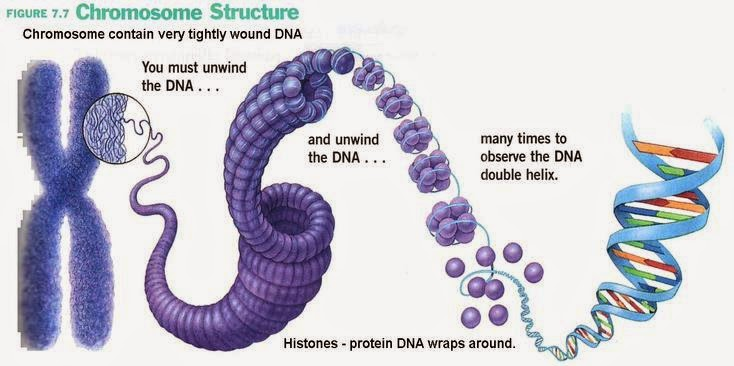

In [8]:
display.Image('Data/ChromosomeStructure.jpg')

In [9]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6. 
#Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [10]:
#human_dna.head()
#print(len(human_texts))
human_dna['words'].shape

(4380,)

Run the above code-block if you would like to confirm that we have 4380 genes for human, 1682 genes for chimpanzee and 820 genes for dogs

### <b> <span style='color:#0055b3'> | </span>Creating Sequences back</b>
As you have seen, We had made our K-mer words from the gene sequence of each class with a length of 6. Correspondingly, we have also created  for each sequence,a new sequence of K-mers, stored in species_texts

In [11]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])

### <b> <span style='color:#0055b3'> | </span>Seperating Labels</b>
Now since we have our sequences that can code for each class in each species as a sequence of K-mers, we are seperating the labels which we would be predicting in the end.

In [12]:
y_human = human_dna.iloc[:, 0].values
y_chim = chimp_dna.iloc[:, 0].values 
y_dog = dog_dna.iloc[:, 0].values 

In [13]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

### <b> <span style='color:#0055b3'> | </span>Creating Bag of Words</b>
Since any NLP model generaly works on vectors and not strings, we need to form vectors out of our sequence of strings for identification of features. One simple approach to do so is using [Bag of Words](https://machinelearningmastery.com/gentle-introduction-bag-words-model).
Python does provide inbuilt library [CountVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for this task. We do have other libraries function as well which can be used for feature extraction from text.<br>
This is essentially forming k-mers only with k = 4 but using this, they are formed in a 2d matrix format thus, helping our ML model function properly

In [14]:
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

Here we will be using human genome for training and validation purpose and then, we will be making predictios about the class of gene from a chimpanzee and a dog.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=1)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#000137;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.4 | Training Model</b></p>
</div>

### <b> <span style='color:#0055b3'> | </span>MultinomialNB</b>
It is a classical classifier algorithm we use for classifying texts into different classes. Like for this problem, we have 7 classes labelled from 0 to 6 and thus out Multinomial Naive Bias Classifier would classify each of the following into one of the 7 labels available depending upon the frequency of occurence of each gene which encodes for some protein.<br>
We are setting alpha (Laplace Correction to 0.1) since there is very low probability that any zero will creep into the vector matrix since they are all four letter long and each one is just a combination of only four letters. i.e., A,T,G,C.
For more details about the algorithm, you can refer to [this video](https://www.youtube.com/watch?v=EyqfNyty_wk&ab_channel=IITMadras-B.S.DegreeProgramme) from IIT Madras.

In [16]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#000137;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.5 | Analysing and Making Predictions</b></p>
</div>

We will use [F1 Score](https://www.baeldung.com/cs/multi-class-f1-score) for evaluating our model's performance. Although you will find it low but remeber that machine learning is a highly itterative process and so I am trying to improve it in future versions.

In [17]:
y_pred = classifier.predict(X_test)

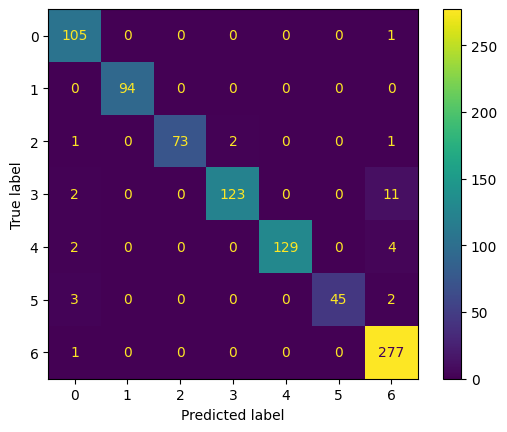

F1 score = 0.9657436380373454


In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
n = f1_score(y_test, y_pred,average = 'macro')
print("F1 score =",n)

The confusion matrix look preety well. We can conclude that indeed the data in well trained for humans. Although there is always some scope of improvement possible.<br>
Let's see how this matrix looks for the other two species!

In [19]:
y_chimp_pred = classifier.predict(X_chimp)
y_dog_pred = classifier.predict(X_dog)

Chimpanzee


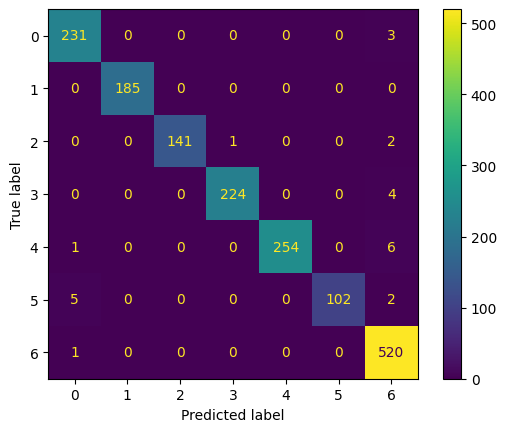

F1 score = 0.984781270709231
Dog


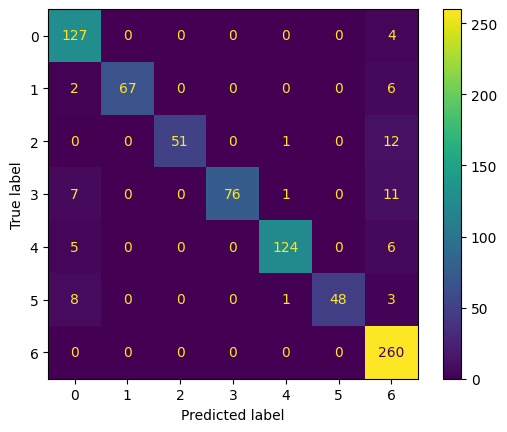

F1 score = 0.9124815597002179


In [20]:
print("Chimpanzee")
cm = confusion_matrix(y_chim, y_chimp_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
n = f1_score(y_chim, y_chimp_pred,average = 'macro')
print("F1 score =",n)
print("Dog")
cm = confusion_matrix(y_dog, y_dog_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
n = f1_score(y_dog, y_dog_pred,average = 'macro')
print("F1 score =",n)

We can see that there are more number of wrong predictions for dog genome compared to chimpanzee genome. Indeed, since we are more close to chimpanzee than to dogs.<br>
It will be good to note that most of the labels that are predicted wrong have been predicted to be six. If you recall, when we plot then histogram, the sampl has more sequences labelled six which led our learning model to predict 6 majority of the times. This can be improved by working on bias-variance tradeoff but that will be done in a later version of notebook.

# <b>5<span style='color:#0055b3'> | </span>Summary</b>
> - We formed a <b>bag of words(bow)</b> of size 4 from the sequence we were given to locate some of the features which are most repeated in the sequence
> - We used <b>multinomial naive bias</b> approach for classification of gene as the instructor for synthesis of either of the six compounds
> - We used <b>F1 score</b> to know the accuracy of our matrix.